# Hand Landmarks Detection

https://developers.google.com/mediapipe/solutions/vision/hand_landmarker

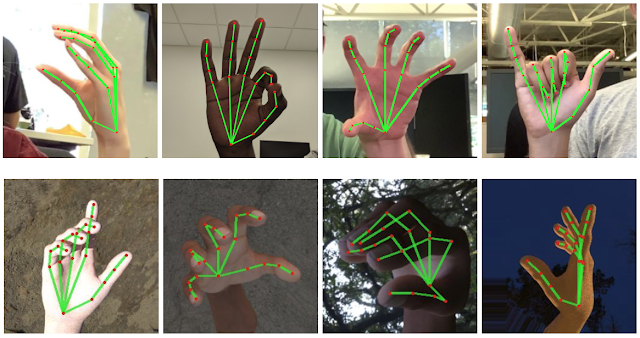

## 라이브러리 설치

* 미디어파이프 라이브러리 설치

In [3]:
#파이썬 3.10을 기준으로 관련 라이브러리를 설치하고 실행했음.
!python -V


Python 3.10.11


In [2]:
!pip install mediapipe
!pip install opencv-python

### 라이브러리 로드 테스트
* 라이브러리가 잘 설치되었는지 테스트한다. 
* ModuleNotFound 에러가 발생되지 않으면 OK.

In [ ]:
import cv2
import mediapipe as mp

## 1. 손 인식 확인

In [4]:
import cv2
import mediapipe as mp
 

mp_hands = mp.solutions.hands
hands = mp_hands.Hands()
mp_drawing = mp.solutions.drawing_utils


cap = cv2.VideoCapture(0)
 
while cap.isOpened():
    success, frame = cap.read()

    if not success:
        continue
    
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    results = hands.process(image)

    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    #손이 인식되었다면
    if results.multi_hand_landmarks:
        #인식된 손마다 랜드마크 그리기
        for hand_landmarks in results.multi_hand_landmarks:

            #랜드마크 선으로 연결해서 출력 
            mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

    cv2.imshow('image', image)
    if cv2.waitKey(1) == ord('q'):
        break
 
cap.release()
cv2.destroyAllWindows()

* 손을 카메라에 가져다 되면 아래와 같이 손의 각 관절에 빨간색 마크(Landmark)가 그려지는 것을 볼 수 있다.
* 손을 움직이면 랜드마크는 실시간 트렉킹이 되는 것을 알 수 있다. 
* 각 랜드마크는 번호가 부여되어 있으며, 좌표를 가지게 된다.

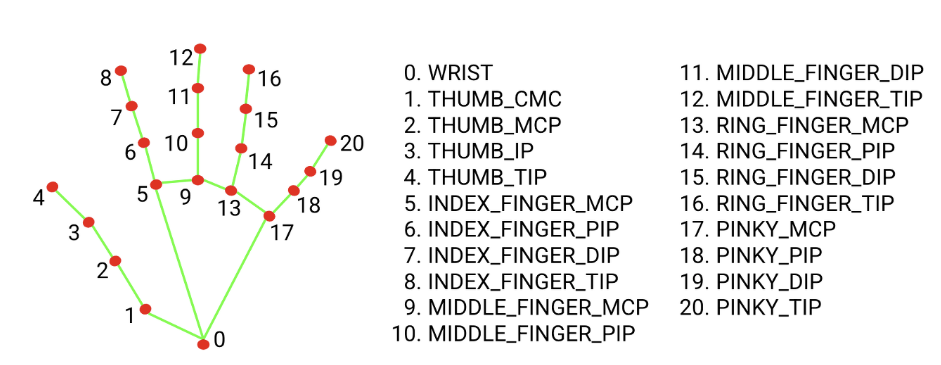

## 2. 랜드마크 좌표 체계 이해하기

* 검지의 좌표를 출력해 보고, 랜드마크 좌표 체계를 이해해보자.

In [6]:
import cv2
import mediapipe as mp
 

mp_hands = mp.solutions.hands
hands = mp_hands.Hands()
mp_drawing = mp.solutions.drawing_utils


cap = cv2.VideoCapture(0)
 
while cap.isOpened():
    success, frame = cap.read()

    if not success:
        continue
    
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    results = hands.process(image)

    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    #손이 인식되었다면
    if results.multi_hand_landmarks:
        #인식된 손마다 랜드마크 그리기
        for hand_landmarks in results.multi_hand_landmarks:

            #검지 좌표 출력
            x = hand_landmarks.landmark[4].x
            y = hand_landmarks.landmark[4].y
            z = hand_landmarks.landmark[4].z

            cv2.putText(image, text=f'x={x} y={y} z={z}', 
            org=(10, 30),fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1,
            color=255, thickness=3)

            #랜드마크 선으로 연결해서 출력    
            mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

    cv2.imshow('image', image)
    if cv2.waitKey(1) == ord('q'):
        break
 
cap.release()
cv2.destroyAllWindows()

* 21개의 각 랜드마크는 x,y,z 좌표체계를 갖는다. 
* x,y는 정규화되어 [0.0~1.0] 사이의 값을 가진다.  -> 즉, 화면 or 이미지 사이즈와 상관없이 비율적으로 어디에 위치해 있는지 알 수 있다. 

## 3. V(브이) 인식하기

* 8번, 12번의 포인트의 위치가 벌어져야 한다.
* 벌어진다는 의미는 각 포인트의 X위치가 서로 차이가 많이 난다는 것이다. 

In [7]:
import cv2
import mediapipe as mp
 

mp_hands = mp.solutions.hands
hands = mp_hands.Hands()
mp_drawing = mp.solutions.drawing_utils


cap = cv2.VideoCapture(0)
 
while cap.isOpened():
    success, frame = cap.read()

    if not success:
        continue
    
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    results = hands.process(image)

    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    #손이 인식되었다면
    if results.multi_hand_landmarks:
        #인식된 손마다 랜드마크 그리기
        for hand_landmarks in results.multi_hand_landmarks:

            finger1 = int(hand_landmarks.landmark[4].x * 100 )
            finger2 = int(hand_landmarks.landmark[8].x * 100 )

            dist = abs(finger1 - finger2) #검지와 중지가 벌어져 있으면
            
            cv2.putText(image, text=f'f1={finger1} f2={finger2} dist={dist}', 
                        org=(10, 30),fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1,
                        color=255, thickness=3)
  
    cv2.imshow('image', image)
    if cv2.waitKey(1) == ord('q'):
        break
 
cap.release()
cv2.destroyAllWindows()

* V의 의미는 검지와 중지가 벌어져 있을 경우를 의미한다. 
* 각 랜드마크의 x좌표값을 비교하고 그 차이가 일정 크기 이상이되면 검지와 중지가 벌어졌다고 판단한다. 
* 이 알고리즘 이외 다른 방법으로 접근할 수도 있다. 
* V를 인지하는 방법은 여러가지이며, 나만의 알고리즘을 만들 수 있다. 

## 4. V(브이) 인식 완성 코드

In [8]:
import cv2
import mediapipe as mp
 

mp_hands = mp.solutions.hands
hands = mp_hands.Hands()
mp_drawing = mp.solutions.drawing_utils


cap = cv2.VideoCapture(0)
 
while cap.isOpened():
    success, frame = cap.read()

    if not success:
        continue
    
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    results = hands.process(image)

    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    #손이 인식되었다면
    if results.multi_hand_landmarks:
        #인식된 손마다 랜드마크 그리기
        for hand_landmarks in results.multi_hand_landmarks:

            finger1 = int(hand_landmarks.landmark[4].x * 100 )
            finger2 = int(hand_landmarks.landmark[8].x * 100 )

            dist = abs(finger1 - finger2) #검지와 중지가 벌어져 있으면
            
            if dist > 8:
                cv2.putText(image, "Victory", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
            else:
                cv2.putText(image, "None", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

            mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

    cv2.imshow('image', image)
    if cv2.waitKey(1) == ord('q'):
        break
 
cap.release()
cv2.destroyAllWindows()